In [650]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [1048]:
df = pd.read_csv('hcj_data.csv', names=['REs', 'PrNd', 'La', 'Ce', 'Fe', 'Co', 'TM', 'B', 'PrNd_p', 'La_p', 'Ce_p', 'Hcj'])
X = df.iloc[:, :11].values
y = df['Hcj'].values
test_data = pd.DataFrame()
tune_1 = pd.DataFrame()
tune_2 = pd.DataFrame()
tune_3 = pd.DataFrame()
df.head(3)

,REs,PrNd,La,Ce,Fe,Co,TM,B,PrNd_p,La_p,Ce_p,Hcj
0,13.0,10.4,0.0,2.6,82.0,0.0,0.0,5.0,0.8,0.0,0.2,12.2
1,13.0,10.4,0.0,2.6,81.5,0.0,0.5,5.0,0.8,0.0,0.2,13.1
2,13.0,10.4,0.0,2.6,81.0,0.0,1.0,5.0,0.8,0.0,0.2,12.8


0.756854400204 0.863175105691


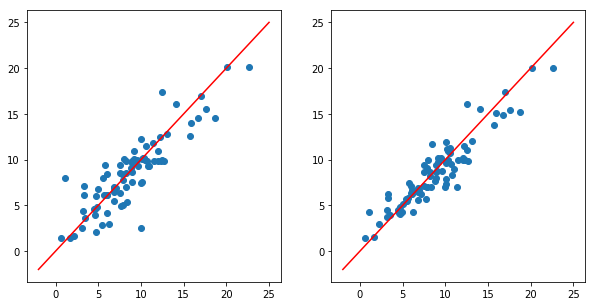

In [1017]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
clf1 = DecisionTreeRegressor(random_state=1)
clf2 = GradientBoostingRegressor(random_state=38)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
score_test1 = clf1.score(X_test, y_test)
score_test2 = clf2.score(X_test, y_test)
print(score_test1, score_test2)

x0 = np.linspace(-2, 25, 100)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred1)
plt.subplot(122)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred2)

In [1060]:
def abserr(y_pred, y_test):
    err = np.abs(y_pred - y_test)
    return err

0.30455032860601872

In [1034]:
test_data['hcj'] = y_test 
test_data['pre1'], test_data['err1']= y_pred1, abserr(y_pred1, y_test)
test_data['pre2'], test_data['err2']= y_pred2, abserr(y_pred2, y_test)
#test_data.to_csv('test.csv', index=False)

In [1020]:
cv = KFold(n_splits=5, shuffle=True, random_state=38)
gbr = GradientBoostingRegressor(random_state=38)

######## Range ########
n_range = np.linspace(10, 290, 15, dtype=int)
learn = np.linspace(0.01, 0.29, 15)
######## Param #########
tuned_parameters_1 = dict(learning_rate=learn, n_estimators=n_range)


clf = GridSearchCV(estimator=gbr, param_grid=tuned_parameters_1, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'learning_rate': 0.12999999999999998, 'n_estimators': 90} with a score of 0.82719, test_score: 0.86269

{'learning_rate': 0.12999999999999998, 'n_estimators': 90}

Grid scores on development set:

r2: 0.0981, std: 0.021 for {'learning_rate': 0.01, 'n_estimators': 10}
r2: 0.2842, std: 0.035 for {'learning_rate': 0.01, 'n_estimators': 30}
r2: 0.4111, std: 0.039 for {'learning_rate': 0.01, 'n_estimators': 50}
r2: 0.5020, std: 0.040 for {'learning_rate': 0.01, 'n_estimators': 70}
r2: 0.5696, std: 0.041 for {'learning_rate': 0.01, 'n_estimators': 90}
r2: 0.6198, std: 0.039 for {'learning_rate': 0.01, 'n_estimators': 110}
r2: 0.6555, std: 0.038 for {'learning_rate': 0.01, 'n_estimators': 130}
r2: 0.6827, std: 0.038 for {'learning_rate': 0.01, 'n_estimators': 150}
r2: 0.7053, std: 0.038 for {'learning_rate': 0.01, 'n_estimators': 170}
r2: 0.7243, std: 0.037 for {'learning_rate': 0.01, 'n_estimators': 190}
r2: 0.7400, std: 0.035 for {'learning_rate': 0.01, 'n_estimator

In [1021]:
scores = clf.cv_results_['mean_test_score'].reshape(len(learn), len(n_range))
scores_1 = pd.DataFrame(scores, index= learn, columns=n_range)
scores_1.to_csv('GBDT_heat.csv')

In [1022]:
gbr_2 = GradientBoostingRegressor(learning_rate=0.12, n_estimators=90,random_state=38)
######## Range ########
max_depth = np.linspace(2, 12, 11, dtype=int)
######## Param #########
tuned_parameters_2 = dict(max_depth=max_depth)


clf = GridSearchCV(estimator=gbr_2, param_grid=tuned_parameters_2, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'max_depth': 4} with a score of 0.82693, test_score: 0.87623

{'max_depth': 4}

Grid scores on development set:

r2: 0.7995, std: 0.020 for {'max_depth': 2}
r2: 0.8238, std: 0.020 for {'max_depth': 3}
r2: 0.8269, std: 0.015 for {'max_depth': 4}
r2: 0.8121, std: 0.035 for {'max_depth': 5}
r2: 0.8129, std: 0.015 for {'max_depth': 6}
r2: 0.8016, std: 0.027 for {'max_depth': 7}
r2: 0.7892, std: 0.021 for {'max_depth': 8}
r2: 0.7794, std: 0.037 for {'max_depth': 9}
r2: 0.7740, std: 0.031 for {'max_depth': 10}
r2: 0.7756, std: 0.033 for {'max_depth': 11}
r2: 0.7636, std: 0.032 for {'max_depth': 12}



In [1023]:
tune_1['max_depth'] = max_depth
tune_1['max_depth_mean'] = means
tune_1['max_depth_std'] = stds
tune_1.to_csv('tune_max_depth.csv', index=False)

In [1024]:
gbr_3 = GradientBoostingRegressor(learning_rate=0.12, n_estimators=90, max_depth=4, random_state=38)
######## Range ########
min_samples_split = np.linspace(2, 17, 16, dtype=int)
######## Param #########
tuned_parameters_3 = dict(min_samples_split=min_samples_split)


clf = GridSearchCV(estimator=gbr_3, param_grid=tuned_parameters_3, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'min_samples_split': 6} with a score of 0.83127, test_score: 0.88486

{'min_samples_split': 6}

Grid scores on development set:

r2: 0.8269, std: 0.015 for {'min_samples_split': 2}
r2: 0.8289, std: 0.018 for {'min_samples_split': 3}
r2: 0.8306, std: 0.016 for {'min_samples_split': 4}
r2: 0.8253, std: 0.012 for {'min_samples_split': 5}
r2: 0.8313, std: 0.013 for {'min_samples_split': 6}
r2: 0.8283, std: 0.010 for {'min_samples_split': 7}
r2: 0.8297, std: 0.013 for {'min_samples_split': 8}
r2: 0.8251, std: 0.014 for {'min_samples_split': 9}
r2: 0.8215, std: 0.015 for {'min_samples_split': 10}
r2: 0.8271, std: 0.011 for {'min_samples_split': 11}
r2: 0.8277, std: 0.013 for {'min_samples_split': 12}
r2: 0.8261, std: 0.013 for {'min_samples_split': 13}
r2: 0.8293, std: 0.007 for {'min_samples_split': 14}
r2: 0.8279, std: 0.009 for {'min_samples_split': 15}
r2: 0.8244, std: 0.019 for {'min_samples_split': 16}
r2: 0.8278, std: 0.007 for {'min_samples_split': 17}



In [1025]:
tune_2['min_samples_split'] = min_samples_split
tune_2['min_samples_split_mean'] = means
tune_2['min_samples_split_std'] = stds
tune_2.to_csv('tune_min_samples_split.csv', index=False)

In [1026]:
gbr_4 = GradientBoostingRegressor(learning_rate=0.12, n_estimators=90, max_depth=4, min_samples_split=6, random_state=38)
######## Range ########
subsample=np.linspace(0.1, 1.0, 10)
######## Param #########
tuned_parameters_4 = dict(subsample=subsample)


clf = GridSearchCV(estimator=gbr_4, param_grid=tuned_parameters_4, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'subsample': 0.59999999999999998} with a score of 0.83334, test_score: 0.89950

{'subsample': 0.59999999999999998}

Grid scores on development set:

r2: 0.8055, std: 0.027 for {'subsample': 0.10000000000000001}
r2: 0.8094, std: 0.023 for {'subsample': 0.20000000000000001}
r2: 0.8220, std: 0.028 for {'subsample': 0.30000000000000004}
r2: 0.8304, std: 0.021 for {'subsample': 0.40000000000000002}
r2: 0.8248, std: 0.022 for {'subsample': 0.5}
r2: 0.8333, std: 0.018 for {'subsample': 0.59999999999999998}
r2: 0.8200, std: 0.018 for {'subsample': 0.70000000000000007}
r2: 0.8283, std: 0.014 for {'subsample': 0.80000000000000004}
r2: 0.8222, std: 0.012 for {'subsample': 0.90000000000000002}
r2: 0.8313, std: 0.013 for {'subsample': 1.0}



In [1030]:
tune_3['subsample'] = subsample
tune_3['subsample_mean'] = means
tune_3['subsample_std'] = stds
tune_3.to_csv('tune_subsample.csv', index=False)

In [1031]:
index = clf.best_index_
train_score =  clf.cv_results_['mean_train_score'][index]
val_score = clf.cv_results_['mean_test_score'][index]
test_socre = clf.score(X_test, y_test)
print(train_score)
print(val_score)
print(test_socre)

0.973290151828
0.833341781508
0.899501388327


In [ ]:
n_range = np.linspace(10, 290, 15, dtype=int)
learn = np.linspace(0.01, 0.29, 15)
max_depth = np.linspace(2, 10, 8, dtype=int)

0.899501388327


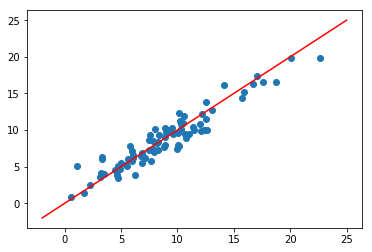

In [1035]:
y_pred = clf.predict(X_test)
score_test = clf.score(X_test, y_test)
print(score_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)
test_data['pre3'], test_data['err3']= y_pred, absolute(y_test, y_pred)
test_data.to_csv('test.csv', index=False)

In [1045]:
clf.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=90, presort='auto',
             random_state=38, subsample=0.59999999999999998, verbose=0,
             warm_start=False)

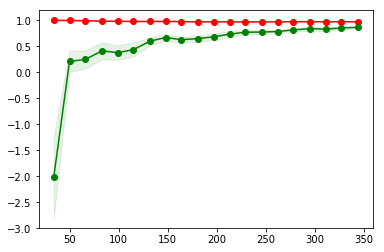

In [1038]:
estimator = clf.best_estimator_
train_sizes=np.linspace(.1, 1.0,20)
cv_1 = KFold(n_splits=6, shuffle=True, random_state=38)
learn_curve = pd.DataFrame()
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv_1, 
                                                        train_sizes=train_sizes, scoring='r2', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

learn_curve['train_sizes'], learn_curve['train_scores'], learn_curve['train_stds'], learn_curve['valid_scores'], learn_curve['valid_stds'] = train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std
learn_curve.to_csv('learn_curve.csv', index=False)

In [1071]:
def mater(CepRs, REs, La=0.0, Co=0.0, TM=0.0, B=6.0):
    PrNd = (REs - La) * CepRs
    Ce = REs - La - PrNd
    Fe = 100.0 - PrNd - Ce - La - Co -TM - B
    PrNd_p, La_p, Ce_p = PrNd / REs, La / REs, Ce / REs
    one_mater = [REs, PrNd, La, Ce, Fe, Co, TM, B, PrNd_p, La_p, Ce_p]
    return one_mater

In [1072]:
list_1 = []
ceprs = np.linspace(0, 1, 21)
res = np.linspace(6, 18, 21)

for i in ceprs:
    for j in res:
        list_1.append(mater(i, j))

a = np.array(list_1)
new = pd.DataFrame(a, columns=['REs', 'PrNd', 'La', 'Ce', 'Fe', 'Co', 'TM', 'B', 'PrNd_p', 'La_p', 'Ce_p'])
new.head(2)

,REs,PrNd,La,Ce,Fe,Co,TM,B,PrNd_p,La_p,Ce_p
0,6.0,0.0,0.0,6.0,88.0,0.0,0.0,6.0,0.0,0.0,1.0
1,6.6,0.0,0.0,6.6,87.4,0.0,0.0,6.0,0.0,0.0,1.0


In [616]:
a = np.linspace(6, 18, 21)
a

array([  6. ,   6.6,   7.2,   7.8,   8.4,   9. ,   9.6,  10.2,  10.8,
        11.4,  12. ,  12.6,  13.2,  13.8,  14.4,  15. ,  15.6,  16.2,
        16.8,  17.4,  18. ])

In [1073]:
new_hcj = clf.predict(new.values).reshape(len(ceprs), len(res))
new_2 = pd.DataFrame(new_hcj, index=ceprs, columns=res)
new_2.to_csv('preds.csv')
#b = new_2 - new_1
#b.to_csv('preds.csv')
#b